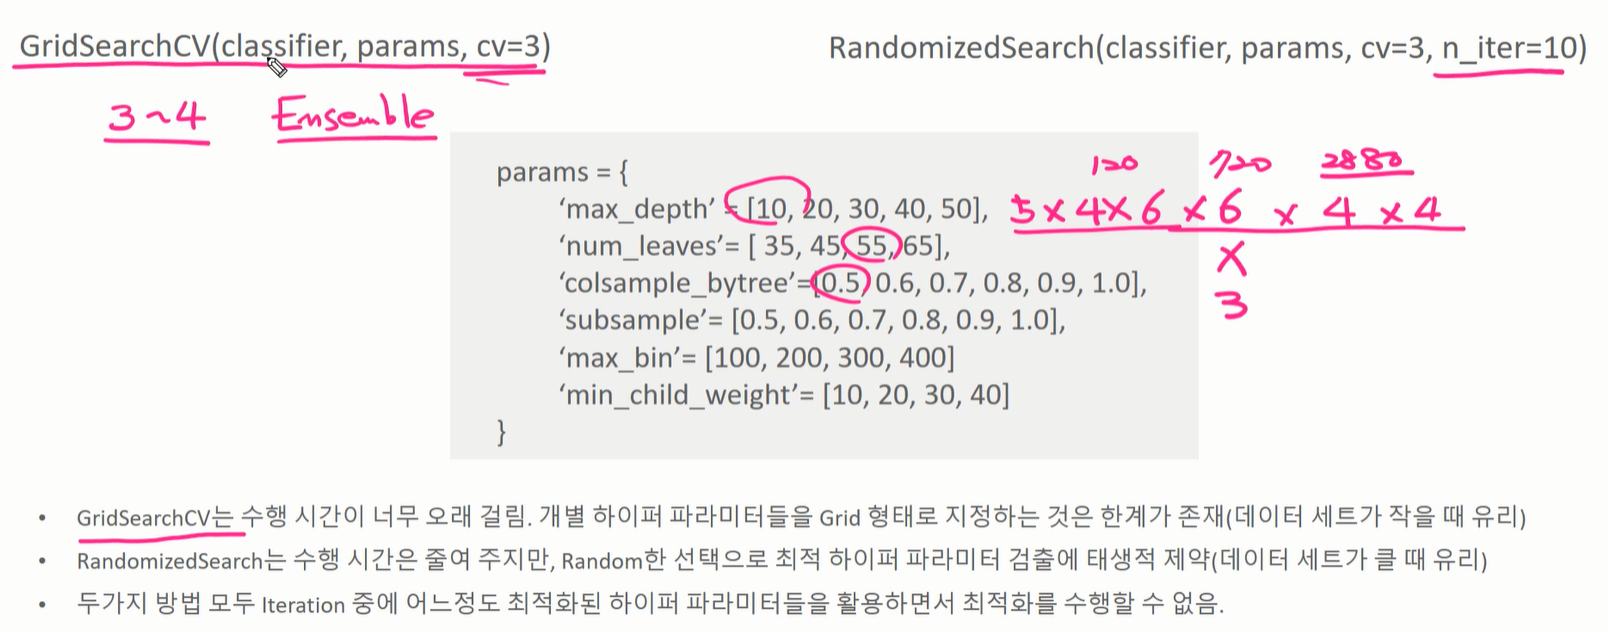
양측의 유불리를 모두 보완하고 **가능한 최소의 시도로 최적의 답을 찾아야 할 때, 개별 시도가 너무 많은 시간/자원을 필요로 할 때** 베이지안 최적화를 사용하면 좋다.

### 베이지안 최적화 개요와 HyperOpt 사용법

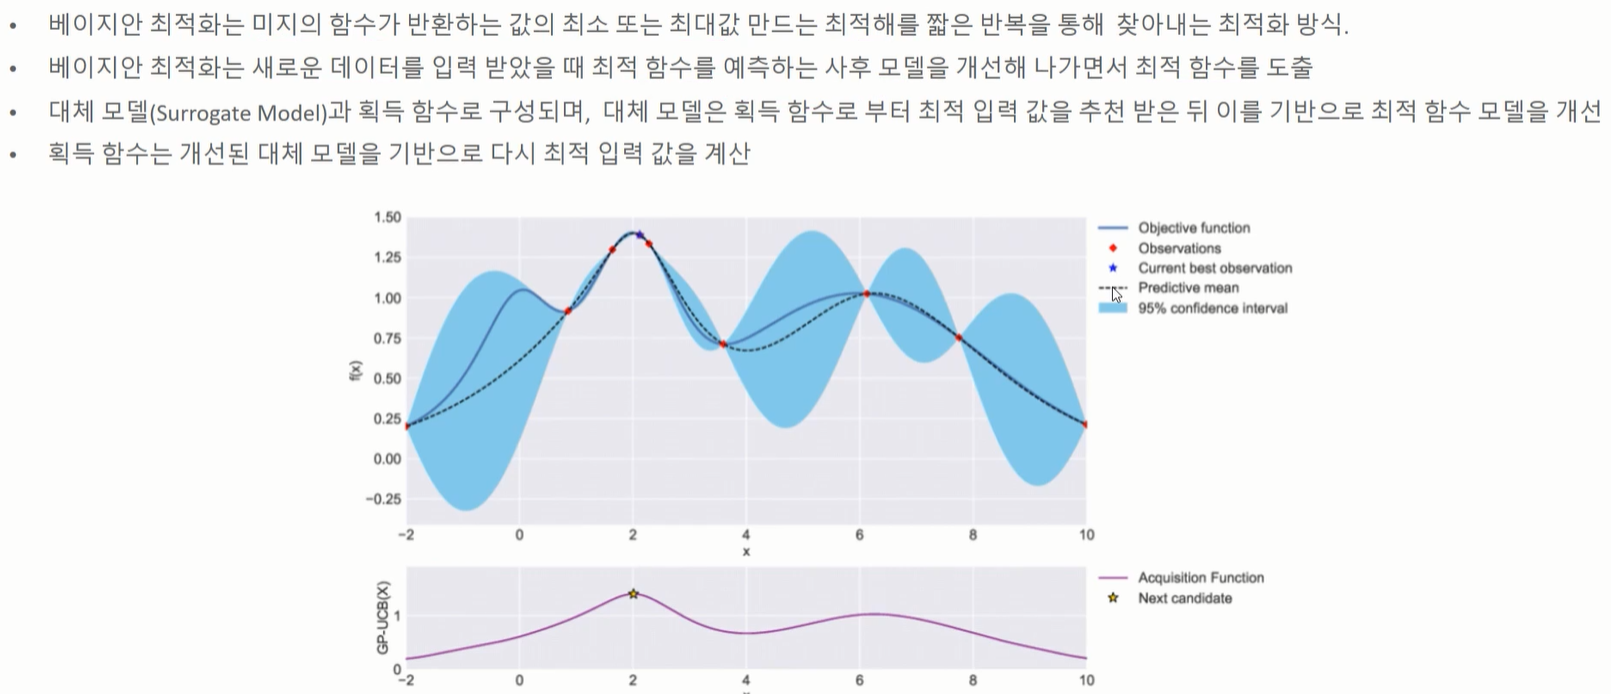

### step 1: 랜덤하게 하이퍼 파라미터를 샘플링하여 성능 결과를 관측
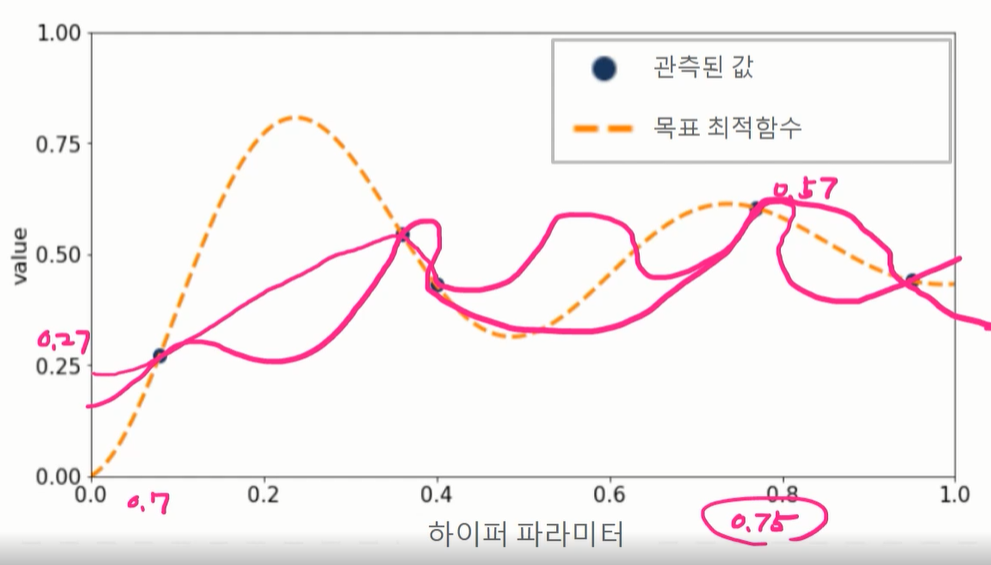
(핑크색 선: 가능성) 여러 경우를 짚어 봄

### step 2: 관측된 값을 기반으로 대체 모델은 최적 함수를 예측 추정
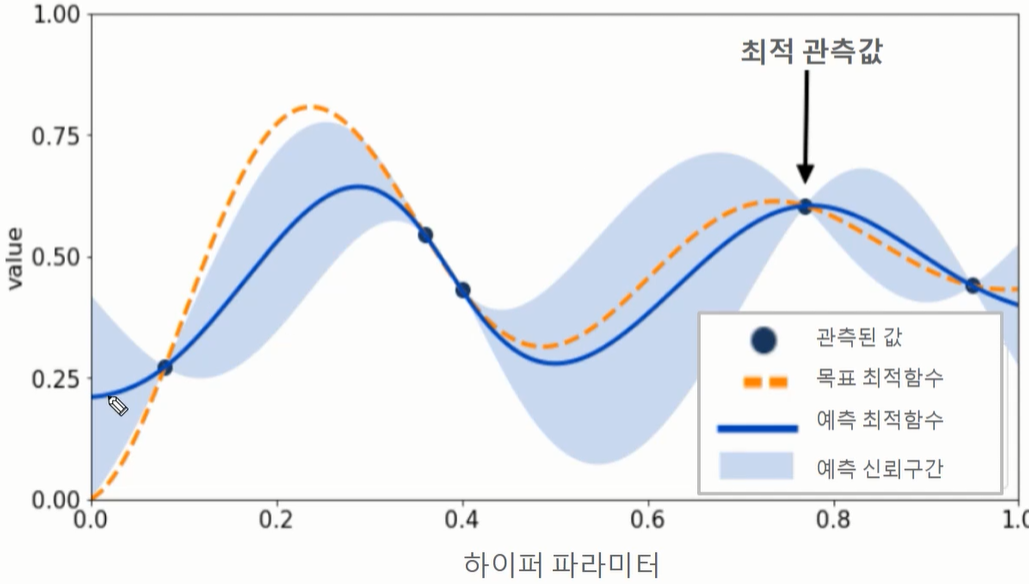
대체 모델 = 예측 최적함수 + 예측 신뢰구간 

### step 3: 획득 함수(대체 모델)에서 다음으로 관측할 하이퍼 파라미터 추출
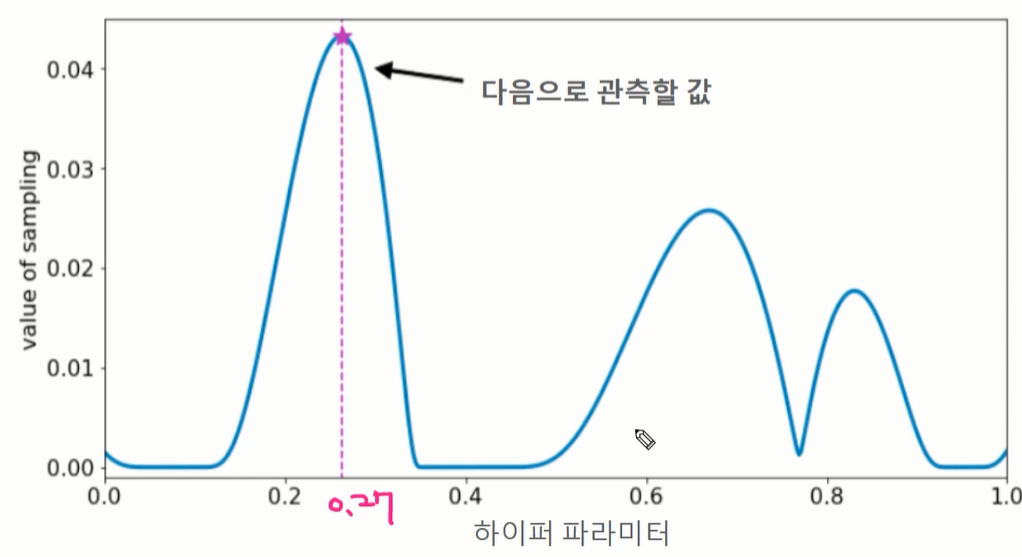
여기서는 0.27

### step 4: 추출한 하이퍼 파라미터로 관측된 값을 기반으로 대체 모델은 다시 최적 함수 예측 추정
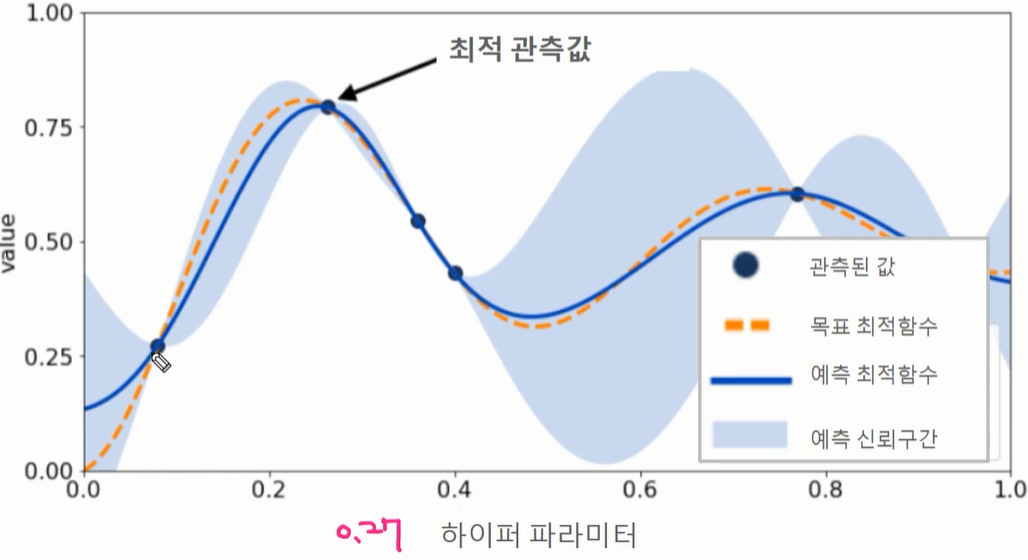

**베이지안 최적화 구현 요소**
1. 입력 값 범위 설정
<br>Search_space = {'x': (범위), 'y': (범위)}
2. 블랙박스 함수
3. 블랙박스 함수의 반환 최소값 유추
<br>fmin(fn=black_box_function(블랙박스 함수), space=search_space(관찰해야 할 공간), algo=tpe.suggest, max_evals=20, trials=trial_val)

**HyperOpt 최적화 구현 요소**
1. 입력 값 범위 설정
<br>Search_space = {'x': hp.quniform(), 'y': hp.quniform()}
2. 블랙박스 함수
```python
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    print('x:' x, 'y:', y)
    return {'loss': x**2+y*20, 'status': STATUS_OK
```

3. 블랙박스 함수의 반환 최소값 유추
<br>fmin(fn=objective_func, space=search_space(관찰해야 할 공간), algo=algo, max_evals=5, trials=trials)

In [1]:
import hyperopt

print(hyperopt.__version__)

0.2.7


In [2]:
#!pip install hyperopt==0.2.7

In [2]:
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력 변수 x 집합값과 -15 ~ 15까지 1간격을 가지는 입력 변수  y 집합값 설정.
# quniform: 검색 공간의 범위 설정 
search_space = {'x': hp.quniform('x', -10, 10, 1),  'y': hp.quniform('y', -15, 15, 1) }

In [3]:
search_space

{'x': <hyperopt.pyll.base.Apply at 0x1b810e7a940>,
 'y': <hyperopt.pyll.base.Apply at 0x1b810e7aca0>}

In [4]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 입력 변수값과 입력 변수 검색 범위를 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x'] # ▲ search_space의 x 값
    y = search_space['y']                   # y 값
    retval = x**2 - 20*y # 이해를 돕기 위한 임의의 함수
    
    return retval # return {'loss': retval, 'status':STATUS_OK}

In [5]:
from hyperopt import fmin, tpe, Trials
import numpy as np

# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5
               , trials=trial_val
               , rstate=np.random.default_rng(seed=0) # 여길 작성 안 하면 매번 바뀜
              ) # 일반적으로 rstate를 작성하지 않는 편이 성능이 더 좋음
                # 데이터 크기가 충분히 클 때!
print('best:', best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 500.29trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [6]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 833.41trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [7]:
trial_val

* HyperOpt 수행 시 적용된 입력 값들과 목적 함수 반환값 보기

In [8]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값} 와 같은 딕셔너리임. 
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [9]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [10]:
# 위 두 셀을 DF로 생성
import pandas as pd 

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성. 
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성. 
result_df = pd.DataFrame({'x': trial_val.vals['x'],
                         'y': trial_val.vals['y'],
                          'losses': losses
                         }
                        )
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


### HyperOpt를 XGBoost 하이퍼 파라미터 튜닝에 적용

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 학습 데이터를 다시 학습과 검증 데이터로 분리 
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train,
                                         test_size=0.1, random_state=156 )

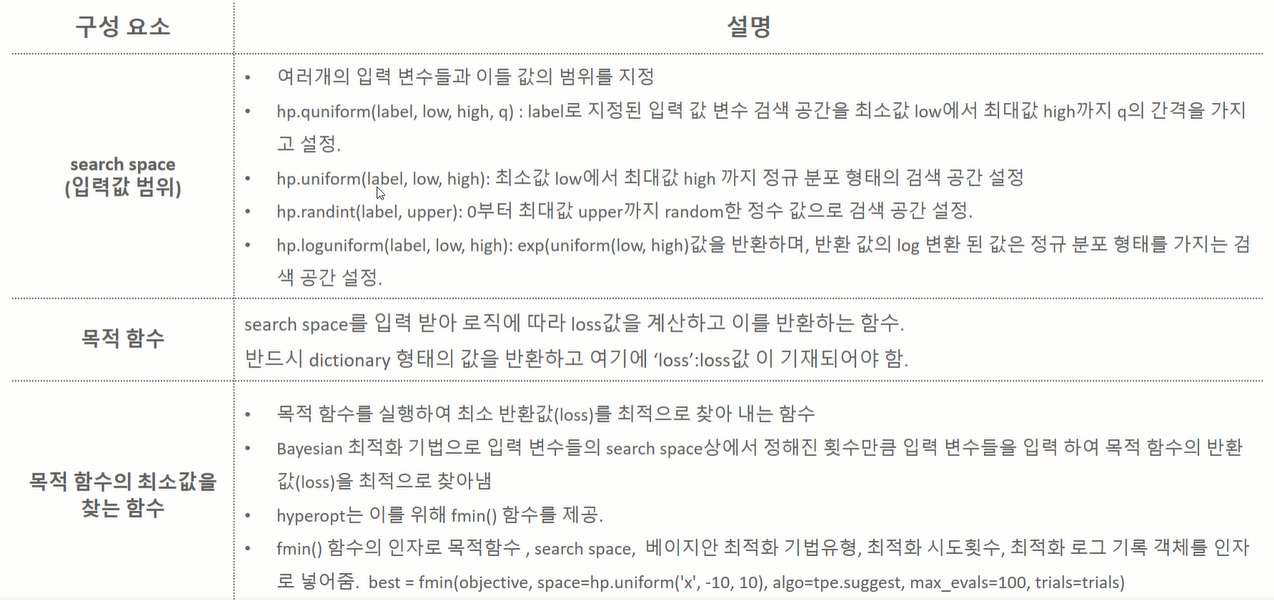

- hp.quniform(): 정수형 파라미터
- hp.uniform(): 정규 분포형 검색 공간

In [12]:
from hyperopt import hp

### Search_Space 설정
# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
               }

In [13]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

### 블랙박스 함수 설정
# fmin()에서 입력된 search_space값으로 입력된 모든 값은 실수형임. 
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함. 
def objective_func(search_space):
    # 수행 시간 절약을 위해 n_estimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                       # 실수형으로 뱉는 search_space를 명시적으로 형 변환해 줘야 한다.
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'], 
                            eval_metric='logloss')
    
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # 정확도는 높은 수록 더 좋은 수치임.
    # -1* 정확도를 곱해서 큰 정확도 값일 수록 최소가 되도록 변환
    # accuracy는 cv=3 개수만큼의 정확도 결과를 가지므로
    # 이를 평균해서 반환하되 -1을 곱해줌. 
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}

In [14]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [00:08<00:00,  5.60trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


In [15]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
                        round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
                        int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.54241, learning_rate:0.12601, max_depth:17, min_child_weight:2


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [17]:
# 소숫점 아래 다섯 자리 자름 round(best['learning_rate'], 5)
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=round(best['learning_rate'], 5), 
                            max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', 
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.58942	validation_1-logloss:0.62048
[1]	validation_0-logloss:0.50801	validation_1-logloss:0.55913
[2]	validation_0-logloss:0.44160	validation_1-logloss:0.50928
[3]	validation_0-logloss:0.38734	validation_1-logloss:0.46815
[4]	validation_0-logloss:0.34224	validation_1-logloss:0.43913
[5]	validation_0-logloss:0.30425	validation_1-logloss:0.41570
[6]	validation_0-logloss:0.27178	validation_1-logloss:0.38953
[7]	validation_0-logloss:0.24503	validation_1-logloss:0.37317
[8]	validation_0-logloss:0.22050	validation_1-logloss:0.35628
[9]	validation_0-logloss:0.19873	validation_1-logloss:0.33798
[10]	validation_0-logloss:0.17945	validation_1-logloss:0.32463
[11]	validation_0-logloss:0.16354	validation_1-logloss:0.31384
[12]	validation_0-logloss:0.15032	validation_1-logloss:0.30607
[13]	validation_0-logloss:0.13813	validation_1-logloss:0.30143
[14]	validation_0-logloss:0.12798	validation_1-logloss:0.29513
[15]	validation_0-logloss:0.11926	validation_1-logloss:0.28891
[1

[130]	validation_0-logloss:0.01639	validation_1-logloss:0.22934
[131]	validation_0-logloss:0.01634	validation_1-logloss:0.22987
[132]	validation_0-logloss:0.01629	validation_1-logloss:0.22927
[133]	validation_0-logloss:0.01624	validation_1-logloss:0.23076
[134]	validation_0-logloss:0.01620	validation_1-logloss:0.23030
[135]	validation_0-logloss:0.01615	validation_1-logloss:0.22891
[136]	validation_0-logloss:0.01610	validation_1-logloss:0.22883
[137]	validation_0-logloss:0.01606	validation_1-logloss:0.22882
[138]	validation_0-logloss:0.01602	validation_1-logloss:0.22876
[139]	validation_0-logloss:0.01597	validation_1-logloss:0.22734
[140]	validation_0-logloss:0.01592	validation_1-logloss:0.22881
[141]	validation_0-logloss:0.01588	validation_1-logloss:0.22935
[142]	validation_0-logloss:0.01583	validation_1-logloss:0.22880
[143]	validation_0-logloss:0.01579	validation_1-logloss:0.22856
[144]	validation_0-logloss:0.01575	validation_1-logloss:0.22725
[145]	validation_0-logloss:0.01571	valid

In [18]:
losses = [loss_dict['loss'] for loss_dict in trial_val.results]
result_df = pd.DataFrame({'max_depth': trial_val.vals['max_depth'],
                          'min_child_weight': trial_val.vals['min_child_weight'],
                          'colsample_bytree': trial_val.vals['colsample_bytree'],
                          'learning_rate': trial_val.vals['learning_rate'],
                          'losses': losses
                         }
                        )
result_df

,max_depth,min_child_weight,colsample_bytree,learning_rate,losses
0,19.0,2.0,0.585235,0.033688,-0.947296
1,5.0,2.0,0.727186,0.105956,-0.960483
2,6.0,2.0,0.959945,0.154804,-0.958290
3,6.0,2.0,0.950012,0.120686,-0.960468
4,16.0,2.0,0.674336,0.142392,-0.962661
5,8.0,2.0,0.863774,0.106579,-0.958275
6,14.0,2.0,0.957521,0.079111,-0.956097
7,19.0,2.0,0.695018,0.095213,-0.960468
8,9.0,2.0,0.684442,0.147520,-0.962661
9,8.0,1.0,0.592116,0.081179,-0.956097
